<a href="https://colab.research.google.com/github/mehdihosseinimoghadam/Signal-Processing/blob/main/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Some imports
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as idp

In [2]:
!wget https://keithito.com/LJ-Speech-Dataset/LJ037-0171.wav

--2021-12-27 20:47:26--  https://keithito.com/LJ-Speech-Dataset/LJ037-0171.wav
Resolving keithito.com (keithito.com)... 151.101.1.195, 151.101.65.195
Connecting to keithito.com (keithito.com)|151.101.1.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334496 (327K) [audio/wav]
Saving to: ‘LJ037-0171.wav’

LJ037-0171.wav      100%[===================>] 326.66K  --.-KB/s    in 0.01s   

2021-12-27 20:47:26 (24.1 MB/s) - ‘LJ037-0171.wav’ saved [334496/334496]



In [3]:
idp.Audio("/content/LJ037-0171.wav")

In [4]:
data, sr = librosa.load("/content/LJ037-0171.wav")
sample_duration = 1/sr
print(f"Shape of data is {data.shape} \nSampling rate is {sr} \nOne sample lastes for {sample_duration} seconds")

Shape of data is (167226,) 
Sampling rate is 22050 
One sample lastes for 4.5351473922902495e-05 seconds


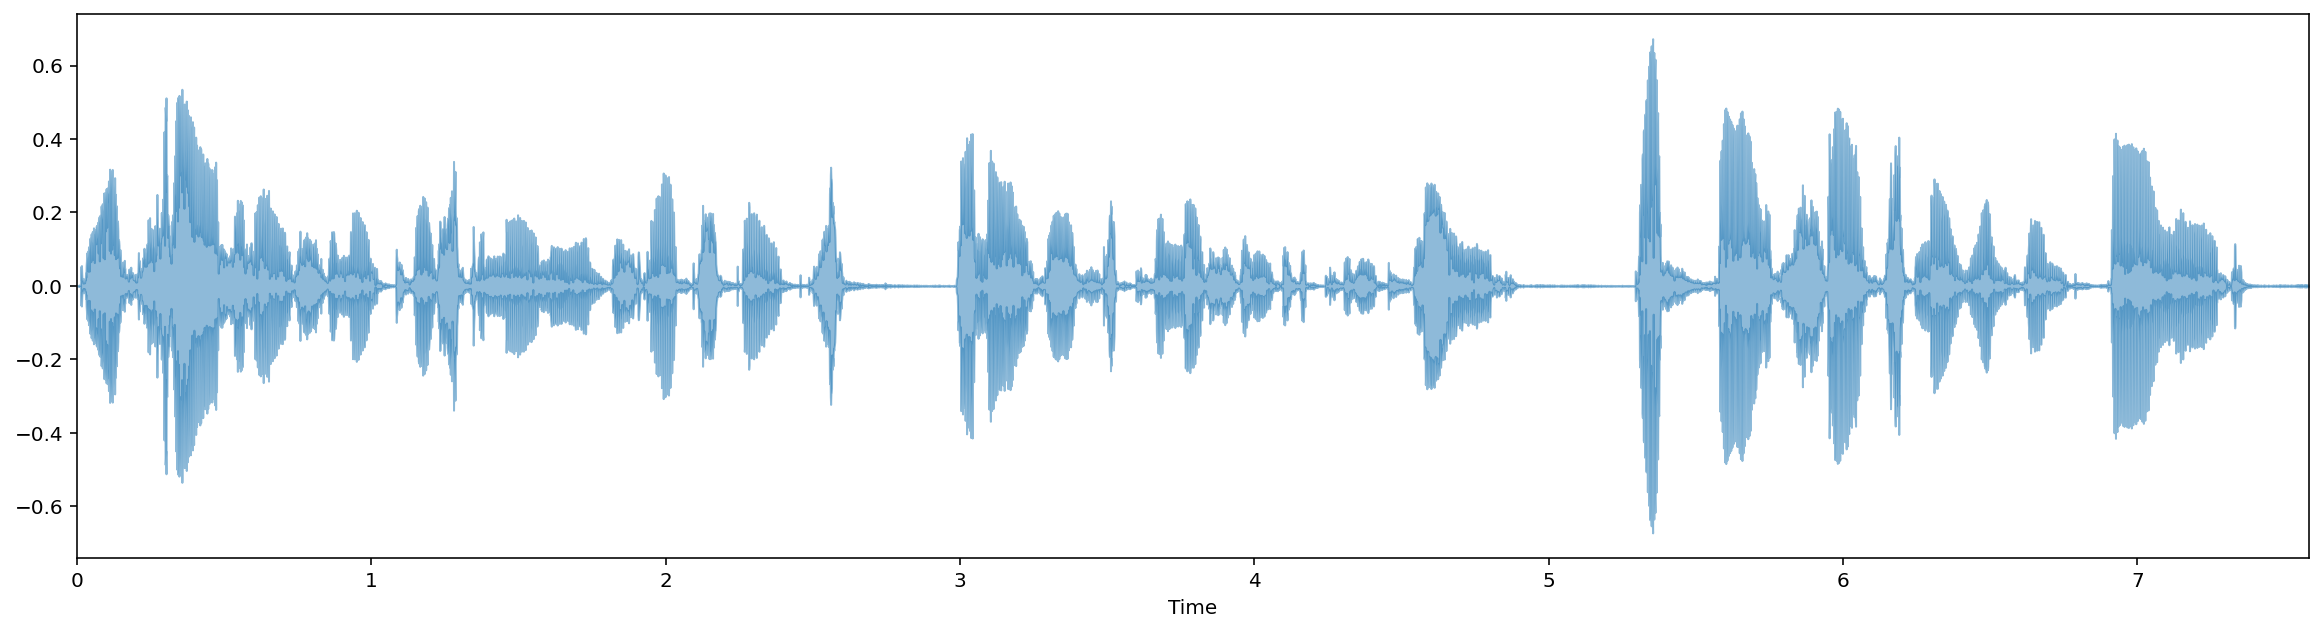

In [12]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(data, alpha = 0.5)
plt.title
plt.show()

## Amplitude Envelope

In physics and engineering, the envelope of an oscillating signal is a smooth curve outlining its extremes. The envelope thus generalizes the concept of a constant amplitude into an instantaneous amplitude. The figure illustrates a modulated sine wave varying between an upper envelope and a lower envelope. The envelope function may be a function of time, space, angle, or indeed of any variable. [Wikipedia](https://en.wikipedia.org/wiki/Envelope_(waves))



![picture](https://drive.google.com/uc?export=view&id=17rDqBb4LREHekNkXgnUTvuz5kE_abmJX)



In [13]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
  return (np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)]), 
         np.array([min(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)]))

In [14]:
uae, lae = amplitude_envelope(data, FRAME_SIZE, HOP_LENGTH)
len(uae)

327

In [16]:
frames = range(len(uae))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

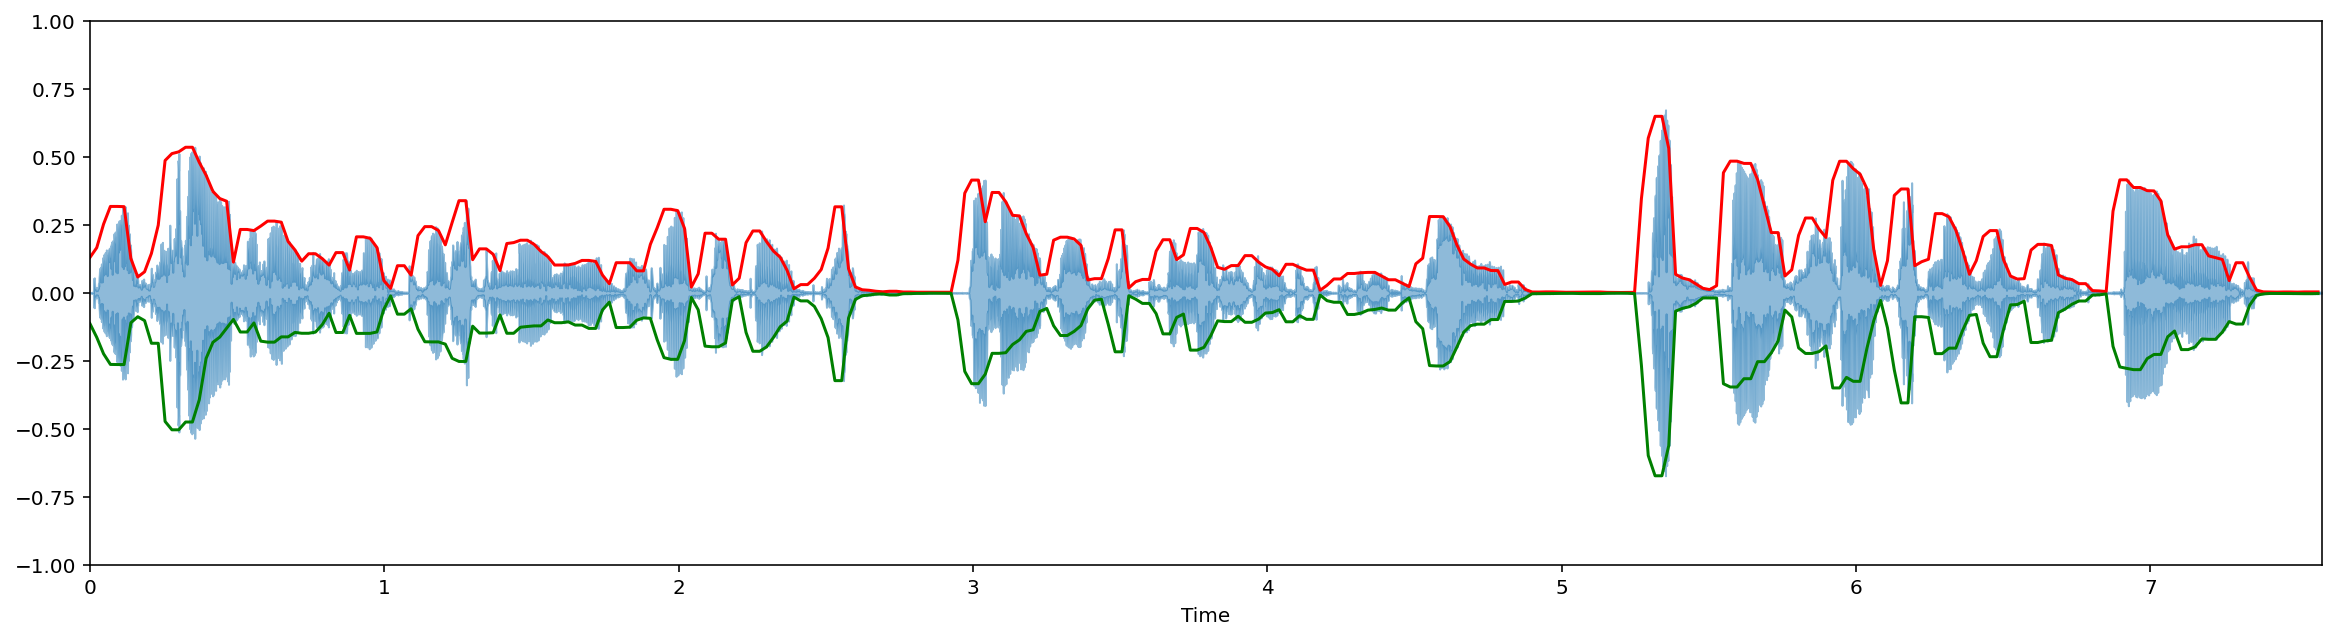

In [18]:
# amplitude envelope is graphed in red

plt.figure(figsize=(20,5))
librosa.display.waveplot(data, alpha=0.5)
plt.plot(t, uae, color="r")
plt.plot(t, lae, color="g")
plt.ylim((-1, 1))


plt.show()

## Root-mean-squared energy

In [8]:
def RMSE(signal, frame_size, hop_size):
  rmse = []
  for i in range(0, len(signal), hop_size):
    e = np.sqrt(sum(signal[i: frame_size + i]**2)/frame_size)
    rmse.append(e)
  return(rmse)    

In [10]:
rmse = RMSE(data, 1024, 512)

In [15]:
frames = range(len(rmse))
t = librosa.frames_to_time(frames, hop_length=512)

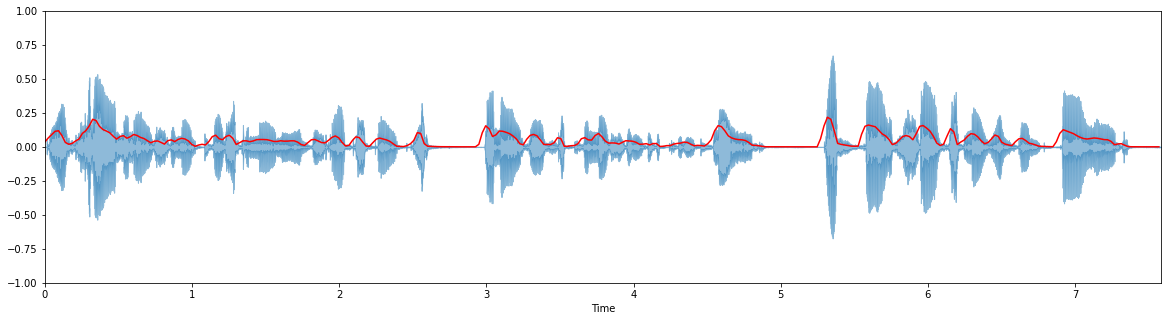

In [17]:
# amplitude envelope is graphed in red

plt.figure(figsize=(20,5))
librosa.display.waveplot(data, alpha=0.5)
plt.plot(t, rmse, color="r")
# plt.plot(t, lae, color="g")
plt.ylim((-1, 1))


plt.show()

## Misc

In [18]:
y, sr = librosa.load('/content/LJ037-0171.wav')


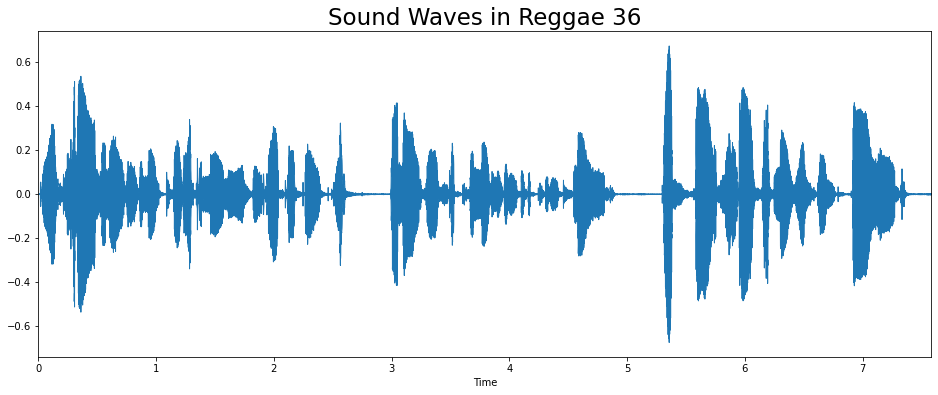

In [37]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = y, sr = sr);
plt.title("Sound Waves in Reggae 36", fontsize = 23);

## Trim the leading and tailing scielence from the input file 
top_db : number > 0
    The threshold (in decibels) below reference to consider as
silence

In [24]:
audio_file, _ = librosa.effects.trim(y,top_db=7,)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.13809204 0.14483643 0.16589355 ... 0.03387451 0.02694702 0.02319336] 

Audio File shape: (154112,)


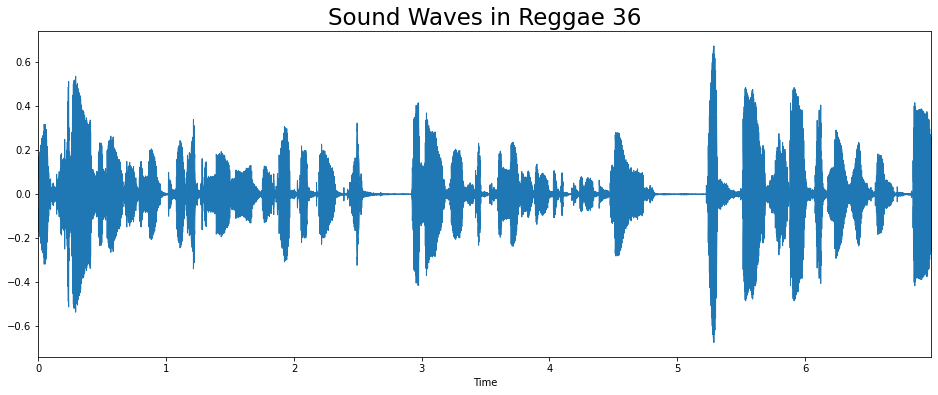

In [36]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr,);
plt.title("Sound Waves in Reggae 36", fontsize = 23);

## Fourier Transform¶
- Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
- Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [34]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 302)


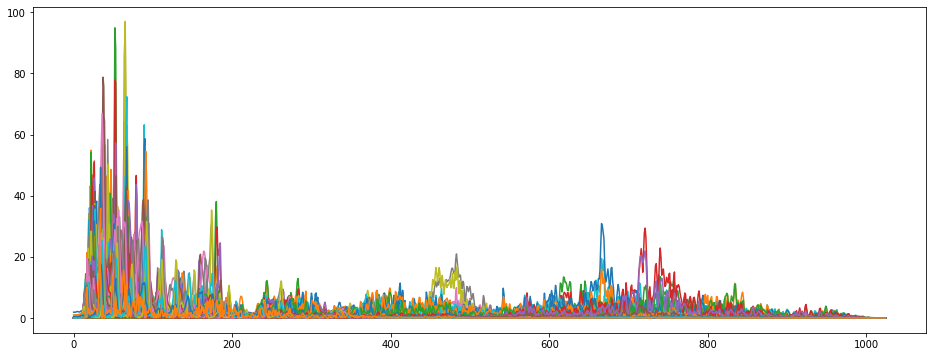

In [32]:
plt.figure(figsize = (16, 6))
plt.plot(D);

## The Spectrogram
What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams (wiki).
Here we convert the frequency axis to a logarithmic one.

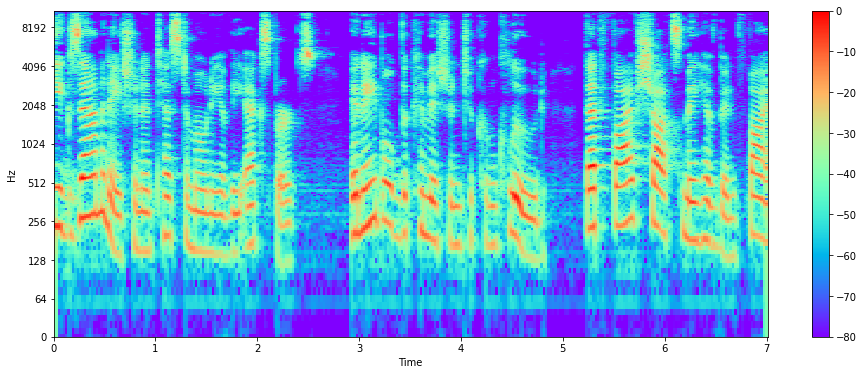

In [45]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'rainbow')
plt.colorbar();

## Mel Spectrogram
- The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

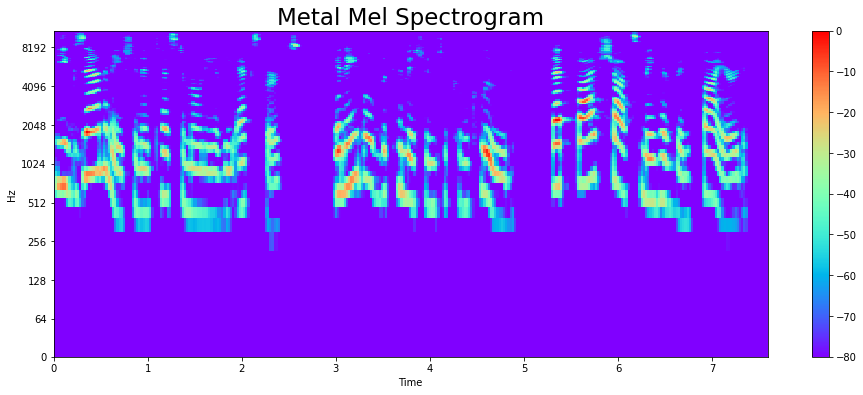

In [49]:
y, sr = librosa.load("/content/LJ037-0171.wav")
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'rainbow');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

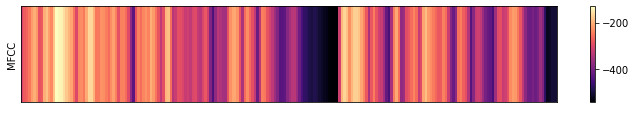

In [55]:

fname_m = "/content/LJ037-0171.wav"
y, sr = librosa.load(fname_m, duration = 5)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 5)

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

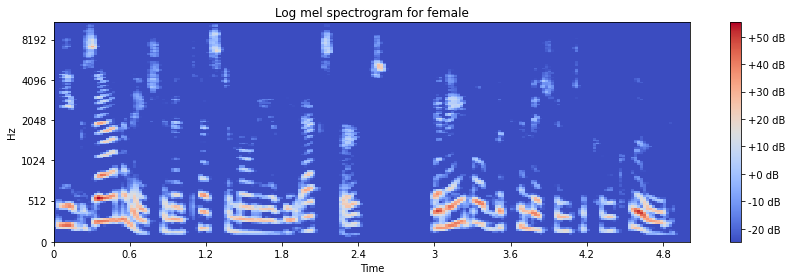

In [57]:
fname_m = "/content/LJ037-0171.wav" 
y, sr = librosa.load(fname_m, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for female')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

## credits

1) https://www.kaggle.com/andradaolteanu/work-w-audio-data-visualise-classify-recommend